In [1]:
from dolfin import *

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


In [2]:
# source term
class Source(UserExpression):
    def eval(self, values, x):
        dx = x[0] - 0.5
        dy = x[1] - 0.5
        values[0] = x[0]*sin(5.0*DOLFIN_EPS*x[1])\
            + 1.0*exp(-(dx*dx+dy*dy)/0.02)

In [3]:
# sub domain for Dirichlet boundary condition
class DirichletBoundary(SubDomain):
    def inside(self, x, on_boundary):
        return bool((x[1] < DOLFIN_EPS or x[1] > (1.0 - DOLFIN_EPS)) \
            and on_boundary)

In [4]:
# sub domain for Periodic boundary condition
class PeriodicBoundary(SubDomain):

    # left boundary is "target domain" G
    def inside(self, x, on_boundary):
        return bool(x[0] < DOLFIN_EPS and x[0] > -DOLFIN_EPS and on_boundary)

    # map right boundary (H) to left boundary (G)
    def map(self, x, y):
        y[0] = x[0] - 1.0
        y[1] = x[1]

In [5]:
# create mesh and finite element
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "CG", 1, constrained_domain=PeriodicBoundary())

In [6]:
# create Dirichlet boundary condition
u0 = Constant(0.0)
dbc = DirichletBoundary()
bc0 = DirichletBC(V, u0, dbc)

In [7]:
# collect boundary conditions
bcs = [bc0]

In [8]:
# define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Source()
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [9]:
# compute solution
u = Function(V)
solve(a == L, u, bcs)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


In [10]:
# save solution to file
file = File("periodic.pvd")
file << u

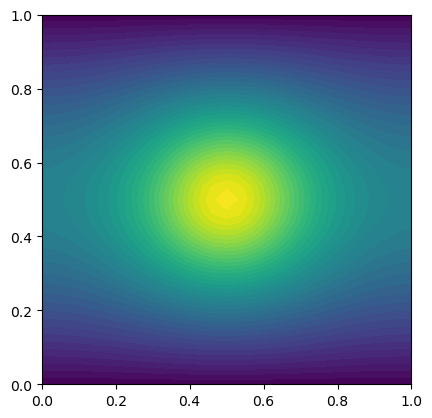

In [11]:
import matplotlib.pyplot as plt
plot(u)
plt.show()